In [75]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [76]:
image_path = '"D:\\Users\\owd1\\Downloads\\ex.tif"'

In [77]:
ds = gdal.Open(image_path)


In [78]:
# Get raster size
x_size = ds.RasterXSize
y_size = ds.RasterYSize
print(f"Size: {x_size} x {y_size}")

AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [ ]:
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [ ]:
num_bands = ds.RasterCount
num_bands

23

IndexError: index 16 is out of bounds for axis 0 with size 16

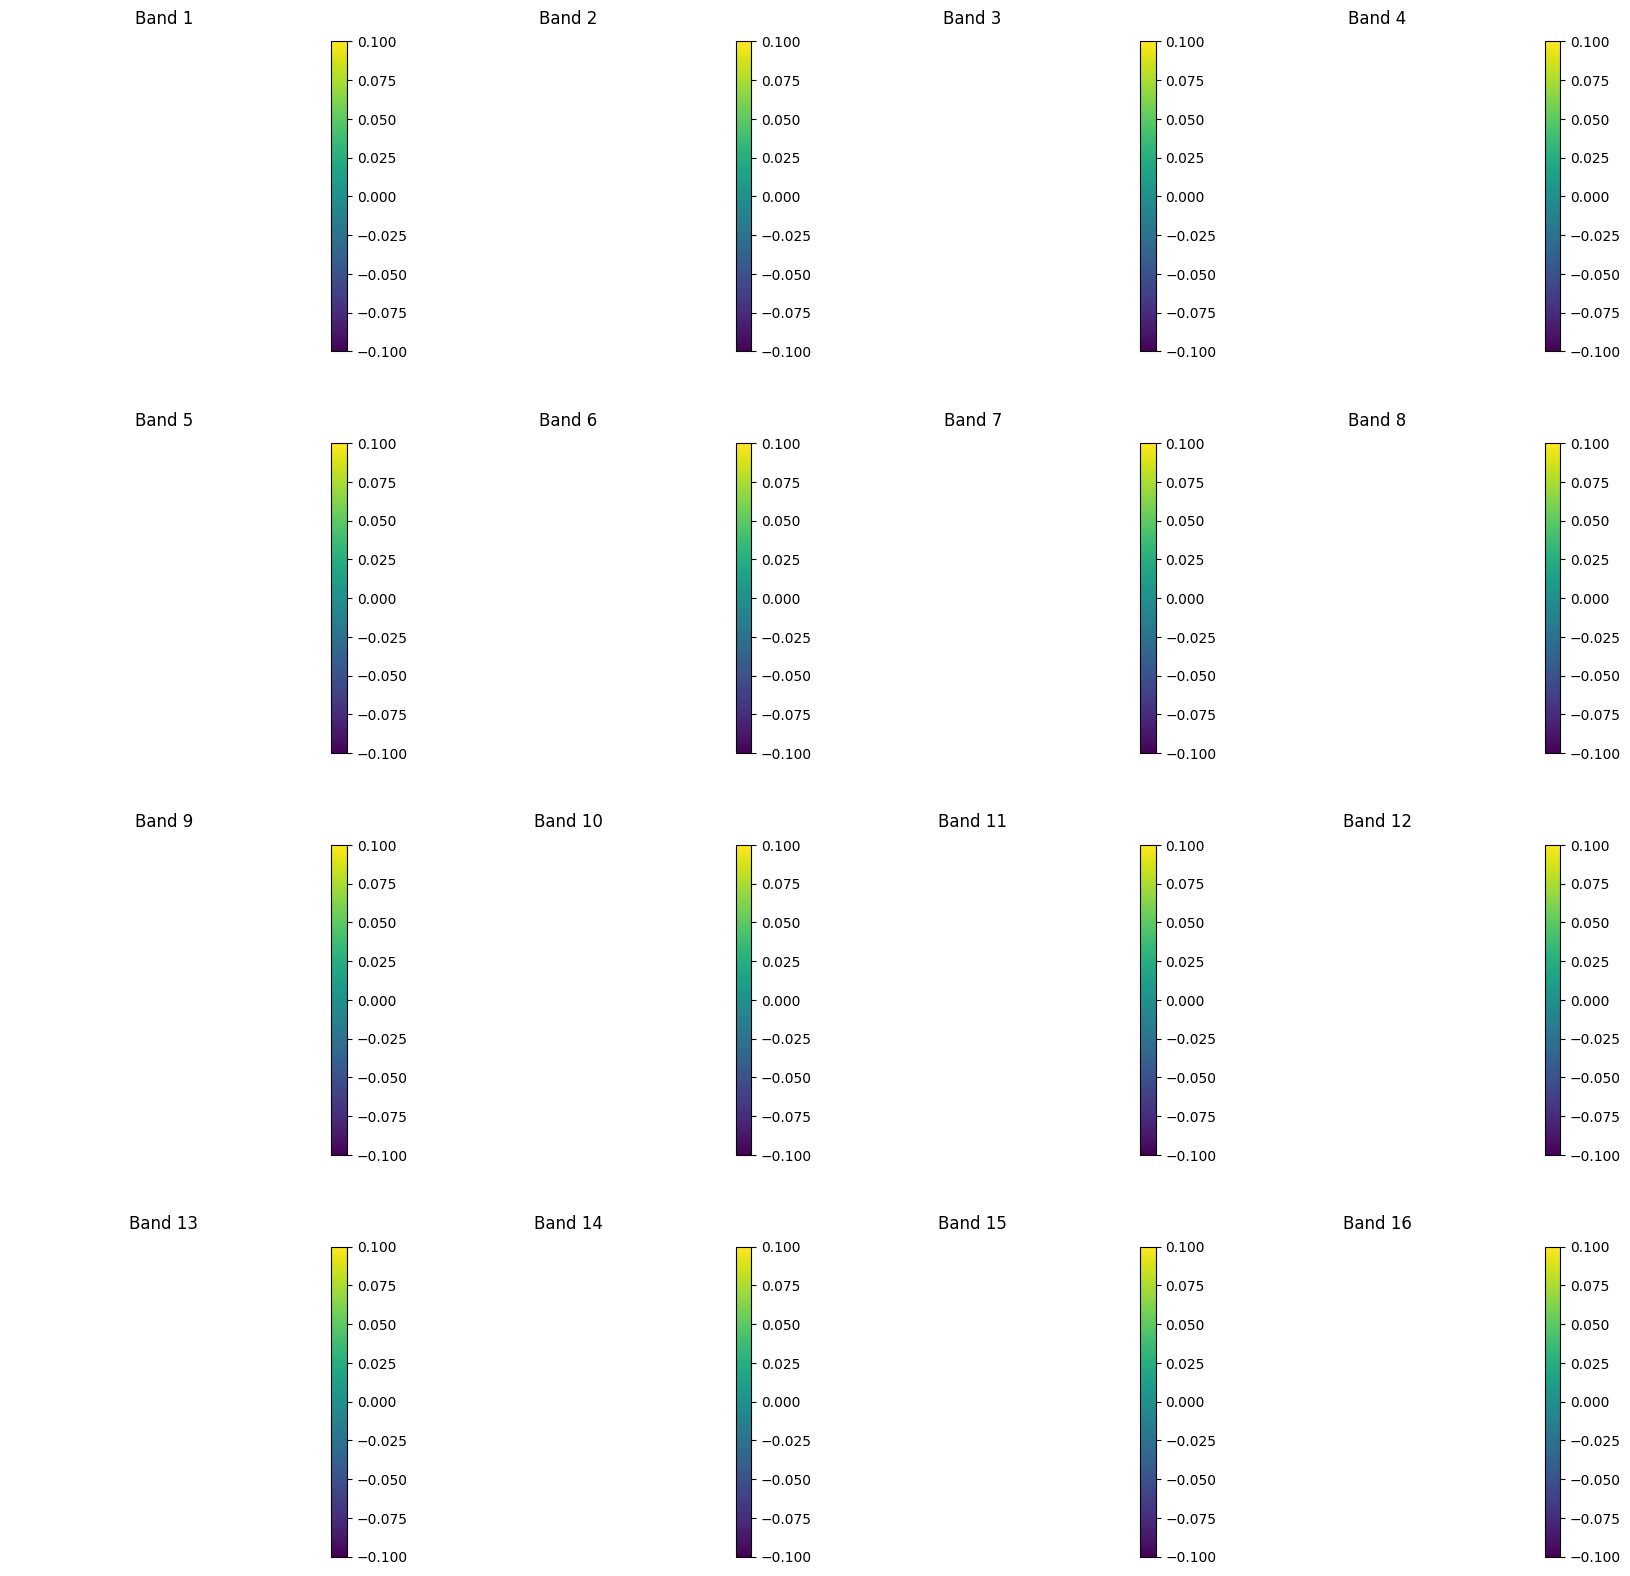

In [ ]:
# Set up the plot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(num_bands):
    band = ds.GetRasterBand(i + 1)  # Bands are 1-indexed in GDAL
    array = band.ReadAsArray()

    ax = axes[i]
    im = ax.imshow(array)
    ax.set_title(f'Band {i + 1}')
    ax.axis('off')

    # Optionally, you can add a colorbar for each subplot
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

C:\Users\owd1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


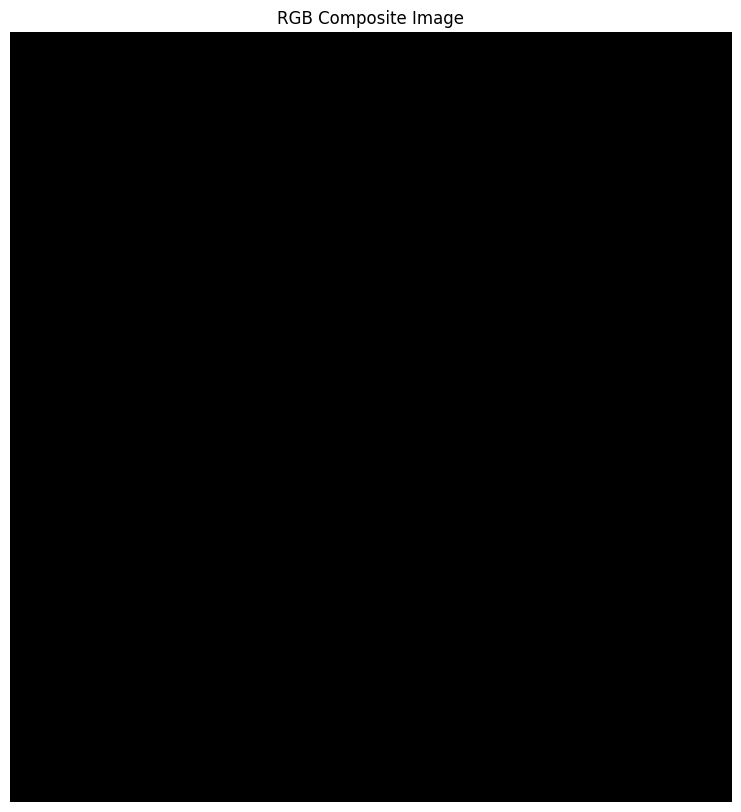

In [ ]:
# Function to normalize array based on a given min and max value for display
def manual_normalize(array, min_val, max_val):
    array = np.clip(array, min_val, max_val)  # Clip to the specified range
    return (array - min_val) / (max_val - min_val)  # Normalize to [0, 1]

# Get bands for Red, Green, and Blue
band_red = ds.GetRasterBand(4).ReadAsArray()
band_green = ds.GetRasterBand(3).ReadAsArray()
band_blue = ds.GetRasterBand(2).ReadAsArray()

# Manually set the min and max values for display range based on histogram inspection or domain knowledge
min_display_val = 1000  # Example value, adjust based on your data
max_display_val = 3000  # Example value, adjust based on your data

# Normalize bands with the manually set display range
n_band_red = manual_normalize(band_red, min_display_val, max_display_val)
n_band_green = manual_normalize(band_green, min_display_val, max_display_val)
n_band_blue = manual_normalize(band_blue, min_display_val, max_display_val)

# Stack bands
rgb = np.dstack((n_band_red, n_band_green, n_band_blue))

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Composite Image')
plt.axis('off')  # Turn off the axis
plt.show()